## Necessary Module

In [19]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
import Own_Regression_module as m_
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre Processing **Covid**

In [20]:
covid_dataset = pd.read_excel('covid_dataset.xlsx')
covid_dataset['Day'] = pd.to_datetime(covid_dataset['Day'])
covid_dataset.set_index('Day', inplace=True)

covid_first_dose = pd.read_excel('covid_first_dose.xlsx')
covid_first_dose['Day'] = pd.to_datetime(covid_first_dose['Day'])
covid_first_dose.set_index('Day', inplace=True)

covid_second_dose = pd.read_excel('covid_second_dose.xlsx')
covid_second_dose['Day'] = pd.to_datetime(covid_second_dose['Day'])
covid_second_dose.set_index('Day', inplace=True)

df = pd.concat([covid_dataset, covid_first_dose, covid_second_dose],
               axis=1, ignore_index=True)
df.rename(columns={0: "Lab Test", 1: "Confirmed Case",
                   2: "Death Case", 3: "First Dose", 4: "Second Dose"}, inplace=True)

df.tail()

,Lab Test,Confirmed Case,Death Case,First Dose,Second Dose
Day,,,,,
2021-12-16,25203,257,3,NaN,NaN
2021-12-17,16310,191,2,NaN,NaN
2021-12-18,13991,122,4,363539.0,927256.0
2021-12-19,19332,211,1,315552.0,89049.0
2021-12-20,19955,260,2,NaN,NaN


In [21]:
df.fillna(0, inplace=True)
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


Lab Test          0
Confirmed Case    0
Death Case        0
First Dose        0
Second Dose       0
dtype: int64
0


<AxesSubplot:>

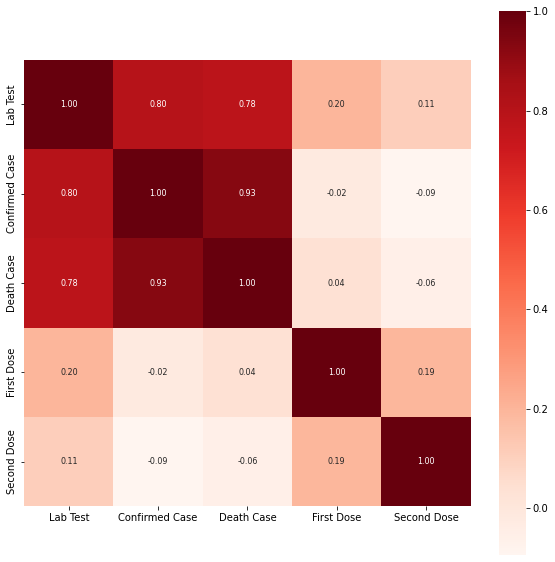

In [22]:
corr = df.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')

array([[<AxesSubplot:title={'center':'Lab Test'}>]], dtype=object)

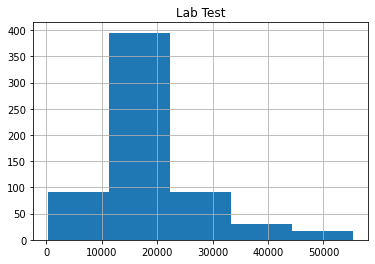

In [23]:
df.hist(column=['Lab Test'], bins=5)

array([[<AxesSubplot:title={'center':'Confirmed Case'}>]], dtype=object)

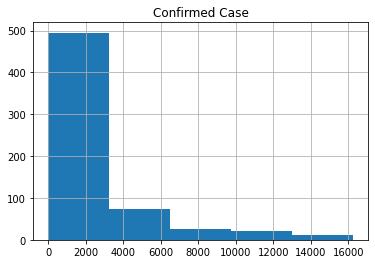

In [24]:
df.hist(column=['Confirmed Case'], bins=5)

array([[<AxesSubplot:title={'center':'Death Case'}>]], dtype=object)

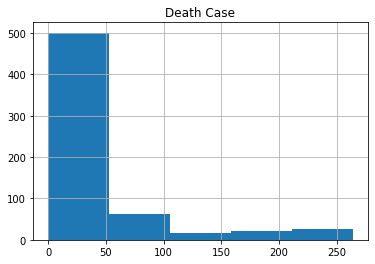

In [25]:
df.hist(column=['Death Case'], bins=5)

array([[<AxesSubplot:title={'center':'First Dose'}>]], dtype=object)

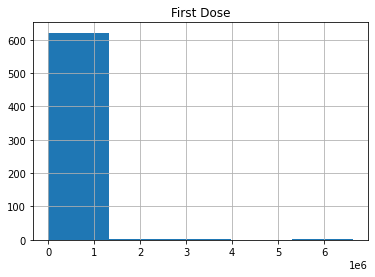

In [26]:
df.hist(column=['First Dose'], bins=5)

array([[<AxesSubplot:title={'center':'Second Dose'}>]], dtype=object)

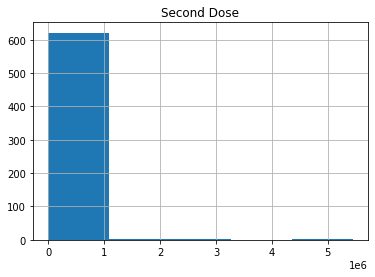

In [27]:
df.hist(column=['Second Dose'], bins=5)

In [28]:
a, b = 0, 0
for i in range(df.shape[0]):
    a += df.iloc[i,3]
    df.iloc[i,3] = a 
    b += df.iloc[i,4]
    df.iloc[i,4] = b

<AxesSubplot:>

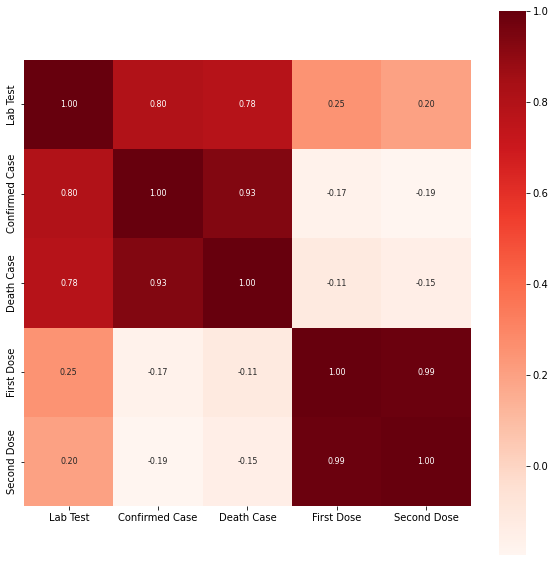

In [29]:
corr = df.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')

In [30]:
X_Death = df.drop(columns = ['Death Case', 'First Dose', 'Second Dose'])
Y_Death = df[['Death Case']]

X_Confirmed = df.drop(columns = ['Confirmed Case','Death Case'])
Y_Confirmed = df[['Confirmed Case']]

# Data Pre Processing **RealEstamate**

In [31]:
RealEstate = pd.read_csv('RealEstate.csv')
RealEstate.set_index('No', inplace=True)
RealEstate.tail()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [32]:
print(RealEstate.isnull().sum())
print(RealEstate.duplicated().sum())


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
0


<AxesSubplot:>

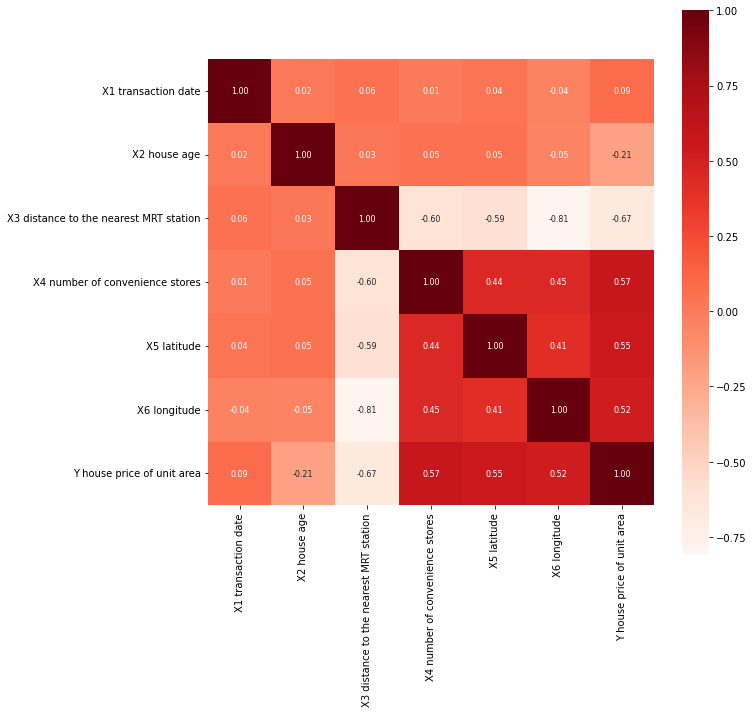

In [33]:
corr = RealEstate.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8}, cmap='Reds')

array([[<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>]],
      dtype=object)

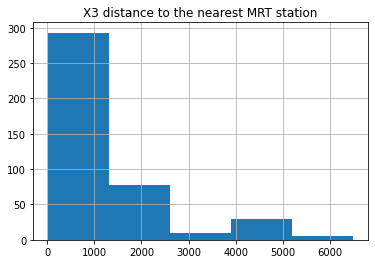

In [34]:
RealEstate.hist(column=['X3 distance to the nearest MRT station'], bins=5)


array([[<AxesSubplot:title={'center':'X4 number of convenience stores'}>]],
      dtype=object)

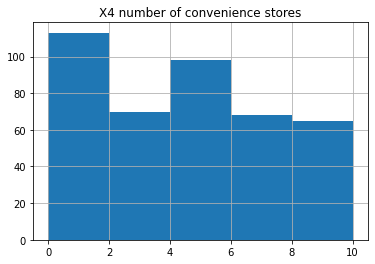

In [35]:
RealEstate.hist(column=['X4 number of convenience stores'], bins=5)


array([[<AxesSubplot:title={'center':'X5 latitude'}>]], dtype=object)

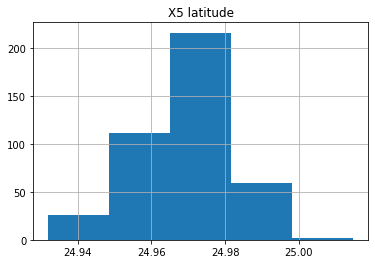

In [36]:
RealEstate.hist(column=['X5 latitude'], bins=5)


array([[<AxesSubplot:title={'center':'X6 longitude'}>]], dtype=object)

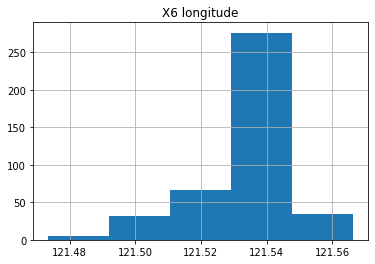

In [37]:
RealEstate.hist(column=['X6 longitude'], bins=5)


array([[<AxesSubplot:title={'center':'X2 house age'}>]], dtype=object)

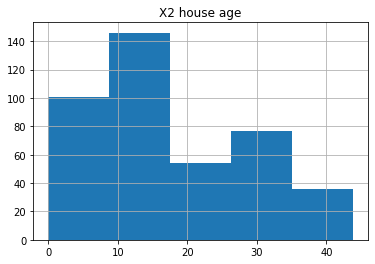

In [63]:
RealEstate .hist(column=['X2 house age'], bins=5)


array([[<AxesSubplot:title={'center':'Y house price of unit area'}>]],
      dtype=object)

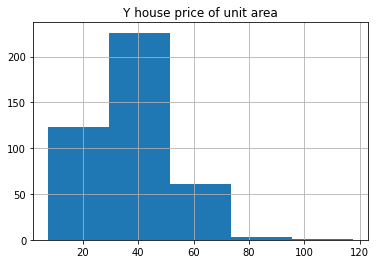

In [64]:
RealEstate .hist(column=['Y house price of unit area'], bins=5)


In [38]:
X_RealEstate = RealEstate.drop(
    columns=['Y house price of unit area', 'X1 transaction date', 'X2 house age'])
Y_RealEstate = RealEstate[['Y house price of unit area']]

Y_RealEstate.head()

,Y house price of unit area
No,
1,37.9
2,42.2
3,47.3
4,54.8
5,43.1


# Functions

#### evaluate_model

In [39]:
def evaluate_model(y, y_predict):
    print('Module Evaluate')
    print('MAE:       ', metrics.mean_absolute_error(y, y_predict))
    print('MSE:       ', metrics.mean_squared_error(y, y_predict))
    print('RMSE:      ', np.sqrt(metrics.mean_absolute_error(y, y_predict)))
    print('R-squared: ', metrics.r2_score(y, y_predict))
        
    # print('\nOwn Module Evaluate')
    # print('MSE:       ', m_.mse_2(y, y_predict))
    # print('MAE:       ', m_.mae_2(y, y_predict))
    # print('RMSE:      ', np.sqrt(m_.mae_2(y, y_predict)))
    # print('R-squared: ', m_.r_squared_2(y, y_predict))


#### plot_model

In [40]:
def plot_model_1(df, x, y, x_test, y_test, model):
    x_axis = np.linspace(x.min(), x.max(), 5000)
    
    plt.figure()
    ax1 = df.plot(kind='scatter', x='Lab Test', y='Death Case', color='red') 
    ax2 = df.plot(kind='scatter', x='Confirmed Case', y='Death Case', color='green', ax=ax1)
    plt.plot(x_axis, model.predict(x_axis), color="black")
    

def plot_model_2(df, x, y, x_test, y_test, model):
    x_axis = np.linspace(x.min(), x.max(), 5000)

    plt.figure()
    ax1 = df.plot(kind='scatter', x='Lab Test', y='Confirmed Case', color='red')
    ax2 = df.plot(kind='scatter', x='First Dose', y='Confirmed Case', color='green', ax=ax1)
    ax3 = df.plot(kind='scatter', x='Second Dose', y='Confirmed Case', color='blue', ax=ax1)
    plt.plot(x_axis, model.predict(x_axis), color="black")
    

def plot_model_3(df, x, y, x_test, y_test, model):
    x_axis = np.linspace(x.min(), x.max(), 5000)

    plt.figure()
    ax1 = df.plot(kind='scatter', x='X3 distance to the nearest MRT station',
                  y='Y house price of unit area', color='green')
    ax2 = df.plot(kind='scatter', x='X4 number of convenience stores',
                  y='Y house price of unit area', color='blue', ax=ax1)
    ax3 = df.plot(kind='scatter', x='X5 latitude',
                  y='Y house price of unit area', color='red', ax=ax1)
    ax4 = df.plot(kind='scatter', x='X6 longitude',
                  y='Y house price of unit area', color='orange', ax=ax1)
    plt.plot(x_axis, model.predict(x_axis), color="black")
    

#### OLS

In [41]:
def OLS(x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    ols_model = sm.OLS(Y_train, X_train)
    results = ols_model.fit()

    Y_pred_train = results.predict(X_train)
    Y_pred_test = results.predict(X_test)

    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)

    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)

    print(results.summary())


#### Linear_Regression

In [42]:
def Linear_Regression(df, x, y, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, Y_train)
    
    Y_pred_train = linear_regression.predict(X_train)
    Y_pred_test = linear_regression.predict(X_test)

    if flg == 0:
        plot_model_1(df, X_train, Y_train, X_test, Y_test, linear_regression)
    elif flg == 1:
        plot_model_2(df, X_train, Y_train, X_test, Y_test, linear_regression)
    else:
        plot_model_3(df, X_train, Y_train, X_test, Y_test, linear_regression)

    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)

    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)
    return linear_regression


#### Polynomial_Regression

In [43]:
def Polynomial_Regression(df, X, Y, degree=2, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=0)
    polynomial_regression = make_pipeline(
        PolynomialFeatures(degree), LinearRegression())
    polynomial_regression.fit(X_train, Y_train)
    Y_pred_train = polynomial_regression.predict(X_train)
    Y_pred_test = polynomial_regression.predict(X_test)

    if flg == 0:
        plot_model_1(df, X_train, Y_train, X_test, Y_test, polynomial_regression)
    elif flg == 1:
        plot_model_2(df, X_train, Y_train, X_test, Y_test, polynomial_regression)
    else:
        plot_model_3(df, X_train, Y_train, X_test, Y_test, polynomial_regression)

    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)

    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)
    return polynomial_regression

#### Lasso_Regression

In [44]:
def Lasso_Regression(df, X, Y, alpha=0.5, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, Y_train)
    Y_pred_train = lasso.predict(X_train)
    Y_pred_test = lasso.predict(X_test)

    if flg == 0:
        plot_model_1(df, X_train, Y_train, X_test, Y_test, lasso)
    elif flg == 1:
        plot_model_2(df, X_train, Y_train, X_test, Y_test, lasso)
    else:
        plot_model_3(df, X_train, Y_train, X_test, Y_test, lasso)

    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)

    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)
    return lasso


#### Ridge_Regression

In [45]:
def Ridge_Regression(df, X, Y, alpha=0.5, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    Y_pred_train = ridge.predict(X_train)
    Y_pred_test = ridge.predict(X_test)

    if flg == 0:
        plot_model_1(df, X_train, Y_train, X_test, Y_test, ridge)
    else:
        plot_model_2(df, X_train, Y_train, X_test, Y_test, ridge)

    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)

    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)
    return ridge


#### ElasticNet_Regression

In [46]:
def ElasticNet_Regression(df, X, Y, alpha = 0.5, l1_ratio = 0.5, flg=0):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)
    elasticNet = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
    elasticNet.fit(X_train, Y_train)
    Y_pred_train = elasticNet.predict(X_train)
    Y_pred_test = elasticNet.predict(X_test)
    
    if flg == 0:
        plot_model_1(df, X_train, Y_train, X_test, Y_test, elasticNet)
    else:
        plot_model_2(df, X_train, Y_train, X_test, Y_test, elasticNet)
    
    print("For Train Dataset: ")
    evaluate_model(Y_train, Y_pred_train)
    
    print("For Test Dataset: ")
    evaluate_model(Y_test, Y_pred_test)
    return elasticNet


# Predict the Death Case

In [47]:
OLS(X_Death,Y_Death)

For Train Dataset: 
Module Evaluate
MAE:        12.254248450189776
MSE:        363.26841115001696
RMSE:       3.500606868842855
R-squared:  0.8721187854211984
For Test Dataset: 
Module Evaluate
MAE:        13.382458881916886
MSE:        453.896727510168
RMSE:       3.658204324790632
R-squared:  0.8693318657516167
                            OLS Regression Results                            
Dep. Variable:             Death Case   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1695.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          1.10e-222
Time:                        11:06:04   Log-Likelihood:                -2183.3
No. Observations:                 500   AIC:                             4373.
Df Residuals:                     497   BIC:                             4385.
Df Model:                           2                

Death Case = -6.7193 + 0.0007 * Lab Test + 0.0155 * Confirmed Case

For Train Dataset: 
Module Evaluate
MAE:        12.254248450189777
MSE:        363.26841115001696
RMSE:       3.500606868842855
R-squared:  0.8721187854211984
For Test Dataset: 
Module Evaluate
MAE:        13.382458881916884
MSE:        453.89672751016775
RMSE:       3.658204324790632
R-squared:  0.8693318657516167


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LinearRegression()

<Figure size 432x288 with 0 Axes>

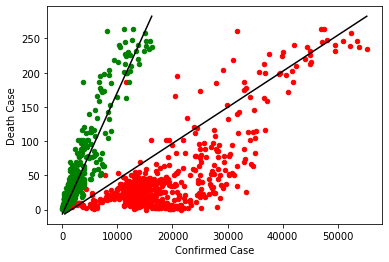

In [48]:
Linear_Regression(df, X_Death, Y_Death)


For Train Dataset: 
Module Evaluate
MAE:        10.12726413525152
MSE:        275.79802966676516
RMSE:       3.1823362699833466
R-squared:  0.9029109442778902
For Test Dataset: 
Module Evaluate
MAE:        11.236526922561021
MSE:        336.3656249390098
RMSE:       3.352092916755295
R-squared:  0.9031668087206306


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

<Figure size 432x288 with 0 Axes>

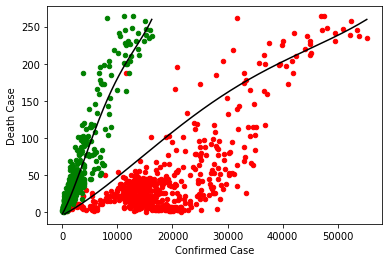

In [49]:
Polynomial_Regression(df, X_Death, Y_Death, degree=4)

For Train Dataset: 
Module Evaluate
MAE:        12.254266672807626
MSE:        363.26841124576237
RMSE:       3.5006094716217095
R-squared:  0.8721187853874931
For Test Dataset: 
Module Evaluate
MAE:        13.382496594215707
MSE:        453.89807759429976
RMSE:       3.6582094792692925
R-squared:  0.8693314770883726


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Lasso(alpha=0.5)

<Figure size 432x288 with 0 Axes>

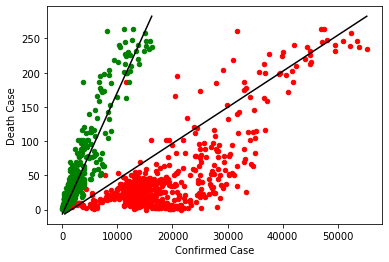

In [50]:
Lasso_Regression(df,X_Death,Y_Death, alpha=0.5)

For Train Dataset: 
Module Evaluate
MAE:        12.254248450681619
MSE:        363.26841115001696
RMSE:       3.500606868913106
R-squared:  0.8721187854211984
For Test Dataset: 
Module Evaluate
MAE:        13.382458882892767
MSE:        453.8967275475459
RMSE:       3.658204324924015
R-squared:  0.8693318657408562


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Ridge(alpha=0.5)

<Figure size 432x288 with 0 Axes>

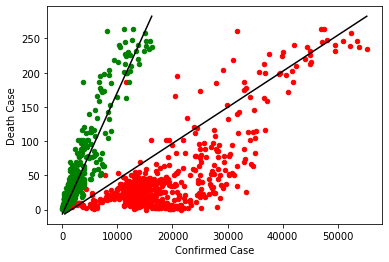

In [51]:
Ridge_Regression(df, X_Death, Y_Death, alpha=0.5)

For Train Dataset: 
Module Evaluate
MAE:        12.254258721132393
MSE:        363.2684111788733
RMSE:       3.5006083358656954
R-squared:  0.87211878541104
For Test Dataset: 
Module Evaluate
MAE:        13.382480725942393
MSE:        453.89747527066237
RMSE:       3.6582073104107145
R-squared:  0.8693316504857582


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


ElasticNet(alpha=0.5)

<Figure size 432x288 with 0 Axes>

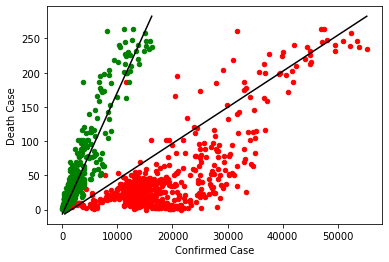

In [52]:
ElasticNet_Regression(df, X_Death, Y_Death, l1_ratio=0.5)

# Predict the Confirmed Case

In [53]:
OLS(X_Confirmed, Y_Confirmed)

For Train Dataset: 
Module Evaluate
MAE:        1079.4549388912678
MSE:        1779756.3669579918
RMSE:       32.8550595630455
R-squared:  0.7859473065532862
For Test Dataset: 
Module Evaluate
MAE:        1001.0132133599344
MSE:        1477116.2930569756
RMSE:       31.63879285560583
R-squared:  0.8489079891313309
                            OLS Regression Results                            
Dep. Variable:         Confirmed Case   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     607.1
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          1.47e-165
Time:                        11:06:08   Log-Likelihood:                -4307.5
No. Observations:                 500   AIC:                             8623.
Df Residuals:                     496   BIC:                             8640.
Df Model:                           3               

Confirme Case = -2025.3646 + 0.2920 * Lab Test - 0.0002 * First Dose + 0.0002 * Second Dose

For Train Dataset: 
Module Evaluate
MAE:        1079.4549388912874
MSE:        1779756.3669579916
RMSE:       32.8550595630458
R-squared:  0.7859473065532862
For Test Dataset: 
Module Evaluate
MAE:        1001.0132133599341
MSE:        1477116.293056512
RMSE:       31.63879285560582
R-squared:  0.8489079891313783


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LinearRegression()

<Figure size 432x288 with 0 Axes>

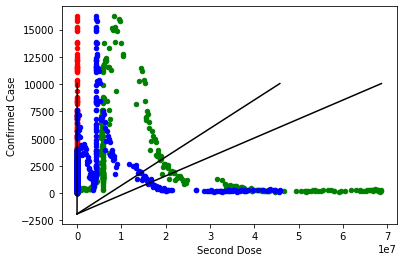

In [54]:
Linear_Regression(df, X_Confirmed, Y_Confirmed, flg=1)

For Train Dataset: 
Module Evaluate
MAE:        819.731838768963
MSE:        1169025.5532834984
RMSE:       28.630959445484237
R-squared:  0.8594003802800981
For Test Dataset: 
Module Evaluate
MAE:        847.3574602138308
MSE:        1314414.733738205
RMSE:       29.109405013050864
R-squared:  0.8655504876837403


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

<Figure size 432x288 with 0 Axes>

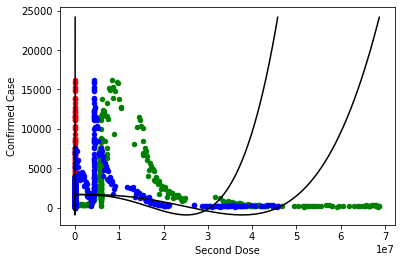

In [55]:
Polynomial_Regression(df, X_Confirmed, Y_Confirmed, degree=4, flg=1)

c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.869e+08, tolerance: 4.157e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


For Train Dataset: 
Module Evaluate
MAE:        1079.4549348074436
MSE:        1779756.3669579956
RMSE:       32.85505950089641
R-squared:  0.7859473065532857
For Test Dataset: 
Module Evaluate
MAE:        1001.0132149325627
MSE:        1477116.3137217844
RMSE:       31.638792880458677
R-squared:  0.8489079870175587


Lasso(alpha=0.5)

<Figure size 432x288 with 0 Axes>

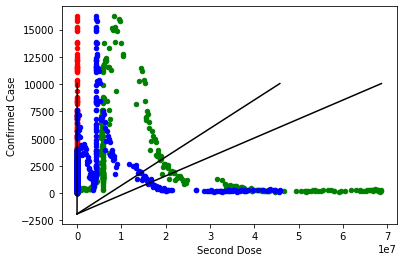

In [56]:
Lasso_Regression(df,  X_Confirmed, Y_Confirmed, alpha=0.5, flg=1)

For Train Dataset: 
Module Evaluate
MAE:        1079.454938888908
MSE:        1779756.366957992
RMSE:       32.85505956300959
R-squared:  0.785947306553286
For Test Dataset: 
Module Evaluate
MAE:        1001.013213360725
MSE:        1477116.2930681256
RMSE:       31.638792855618323
R-squared:  0.8489079891301904


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Ridge(alpha=0.5)

<Figure size 432x288 with 0 Axes>

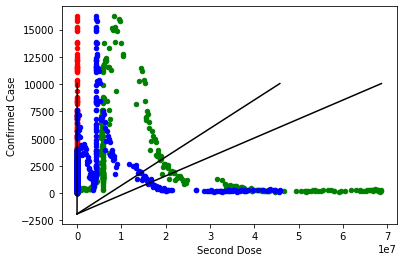

In [57]:
Ridge_Regression(df,  X_Confirmed, Y_Confirmed, alpha=0.5, flg=1)

c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.530e+08, tolerance: 4.157e+05
  model = cd_fast.enet_coordinate_descent(


For Train Dataset: 
Module Evaluate
MAE:        1079.454936250004
MSE:        1779756.3669579932
RMSE:       32.855059522849814
R-squared:  0.7859473065532859
For Test Dataset: 
Module Evaluate
MAE:        1001.0132144113952
MSE:        1477116.3065376107
RMSE:       31.638792872222467
R-squared:  0.8489079877524169


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


ElasticNet(alpha=0.5)

<Figure size 432x288 with 0 Axes>

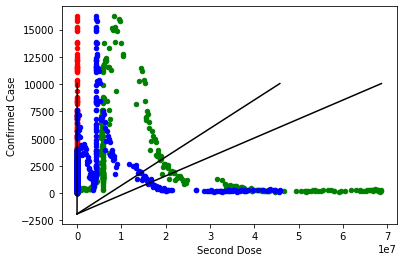

In [58]:
ElasticNet_Regression(df,  X_Confirmed, Y_Confirmed, l1_ratio=0.5, flg=1)

# RealEstate

In [59]:
OLS(X_RealEstate,Y_RealEstate)

For Train Dataset: 
Module Evaluate
MAE:        6.806370718759013
MSE:        92.36192404071784
RMSE:       2.6089022056717672
R-squared:  0.5072588614341139
For Test Dataset: 
Module Evaluate
MAE:        6.742929696370378
MSE:        73.06170336711821
RMSE:       2.5967151742866177
R-squared:  0.5793775558118628
                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.507
Model:                                    OLS   Adj. R-squared:                  0.501
Method:                         Least Squares   F-statistic:                     83.90
Date:                        Mon, 29 Aug 2022   Prob (F-statistic):           6.60e-49
Time:                                11:06:13   Log-Likelihood:                -1218.7
No. Observations:                         331   AIC:                             2447.
Df Residuals:                             326   BIC:                        

House Price = -7469.3053 - 0.0042 * X3 distance to the nearest MRT station + 1.0787 * X4 number of convenience stores + 224.7549 * X5 latitude + 15.5986 * X6 longitude

For Train Dataset: 
Module Evaluate
MAE:        6.806370718760307
MSE:        92.36192404071737
RMSE:       2.6089022056720155
R-squared:  0.5072588614341164
For Test Dataset: 
Module Evaluate
MAE:        6.742929696371063
MSE:        73.06170336713042
RMSE:       2.5967151742867496
R-squared:  0.5793775558117925


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


LinearRegression()

<Figure size 432x288 with 0 Axes>

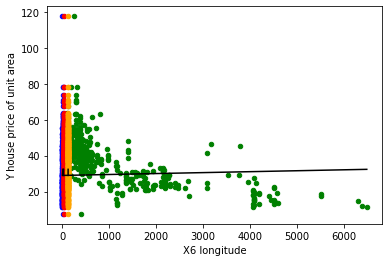

In [60]:
Linear_Regression(RealEstate, X_RealEstate, Y_RealEstate, flg=3)

For Train Dataset: 
Module Evaluate
MAE:        5.813473964331733
MSE:        73.21548649076414
RMSE:       2.411114672580243
R-squared:  0.609403089543586
For Test Dataset: 
Module Evaluate
MAE:        5.951397070037314
MSE:        62.84600956329298
RMSE:       2.439548538159738
R-squared:  0.6381901744453402


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

<Figure size 432x288 with 0 Axes>

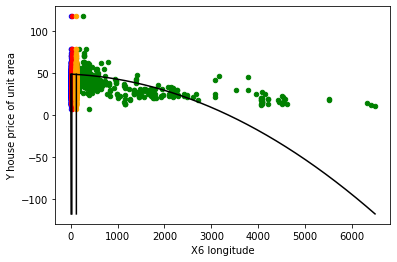

In [61]:
Polynomial_Regression(RealEstate, X_RealEstate, Y_RealEstate, degree=2, flg=3)

For Train Dataset: 
Module Evaluate
MAE:        6.97026588741734
MSE:        97.72271592254977
RMSE:       2.6401261120289954
R-squared:  0.47865960126382845
For Test Dataset: 
Module Evaluate
MAE:        6.942877921388322
MSE:        74.59069936492867
RMSE:       2.63493413985783
R-squared:  0.5705749957275279


c:\Users\Lucifer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Lasso(alpha=0.5)

<Figure size 432x288 with 0 Axes>

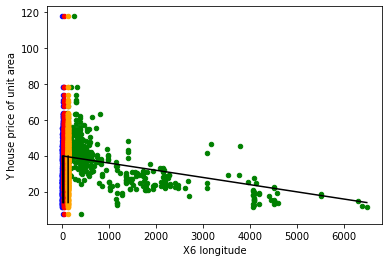

In [62]:
Lasso_Regression(RealEstate, X_RealEstate, Y_RealEstate, alpha=0.5, flg=3)